## SYRIA TEL CHURN PREDICTIONS
<img src="images/syriatel.jpg" alt="Header Image" width="1100" height="400">


## Business understanding

### Overview
SyriaTel is a telecommunications company that provides mobile and data services to thousands of customers. Like many telecom providers, SyriaTel faces a recurring challenge: customer churn — when customers stop using the company's services and switch to a competitor.
Churn results in significant losses because acquiring new customers is far more expensive than retaining existing ones. This project aims to use machine learning classification models to help SyriaTel identify customers who are at high risk of leaving.

### Business Problem
SyriaTel currently does not have an effective system for predicting churn early enough to intervene. Many customers who leave show warning signs — such as increased customer service calls or specific plan choices — but these signals are not consistently tracked or analyzed.

Because of this:

* SyriaTel loses revenue when valuable customers leave.
* The marketing team cannot target retention campaigns effectively.
* Customer service cannot focus on high-risk customers who need support.
* The company lacks data-driven insight into the main reasons behind churn.

### Objectives
* Build a classification model to predict customer churn.
* Evaluate model performance using metrics like AUC, recall, and F1-score.
* Identify key factors that contribute to churn.
* Provide actionable recommendations for reducing customer churn.
* Support SyriaTel in improving retention and reducing revenue loss.


## IMPORTING NECESSARY LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score

import warnings
warnings.filterwarnings("ignore")

## DATA UNDERSTANDING
The SyriaTel dataset contains information about mobile customers.In this section, we examine the dataset’s structure, feature types, missing values, and basic statistics to better understand the data before preprocessing and modeling.

Key Features:

Usage Patterns: Call minutes, number of calls (day, evening, night, international), voicemail messages

Account Information: Account length, state, area code, international plan, voicemail plan

Customer Service: Number of customer service calls

Target Variable , churn:

TRUE = customer will leave

FALSE= customer will stay

In [3]:
df = pd.read_csv("syriatel.csv",low_memory=False) # Loading of data
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
print("shape:",df.shape)# finds the shape(number of rows and columns)
print("="*50)
df.info()# get the information of the table
print("="*50)
print("Missing values per column:")
print(df.isnull().sum()) # finds the missing values per column
print("="*50)
print("Number of duplicate rows:", df.duplicated().sum())# get the duplicate rows
print("="*50)

shape: (3333, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls     

In [5]:
df.drop(['phone number'],axis=1,inplace=True)#dropping phonenumber column not important in our analysis
df.nunique()#checking  for unique values

state                       51
account length             212
area code                    3
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

0    2850
1     483
Name: churn, dtype: int64


Text(0.5, 1.0, 'count of churn')

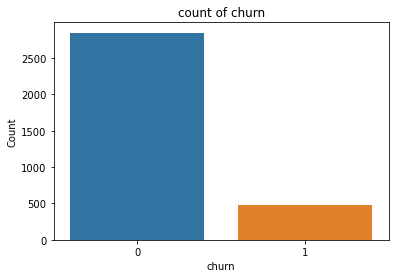

In [6]:
#Convert churn vales to 0's and 1's
df['churn'] = df['churn'].map({True: 1, False: 0}).astype('int') 
#count plot for churn values
print(df.churn.value_counts())
sns.countplot(data=df, x='churn');
plt.xlabel('churn')
plt.ylabel('Count')
plt.title('count of churn')

415    1655
510     840
408     838
Name: area code, dtype: int64


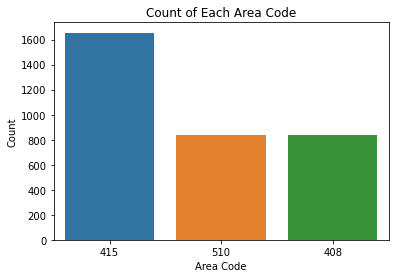

In [7]:
# count plot for Area code
area_code_counts = df['area code'].value_counts()
print(area_code_counts)

# Plot the counts using Seaborn
sns.countplot(data=df, x='area code', order=area_code_counts.index)
plt.xlabel('Area Code')
plt.ylabel('Count')
plt.title('Count of Each Area Code')
plt.show()

no     3010
yes     323
Name: international plan, dtype: int64


Text(0.5, 1.0, 'count of international plan')

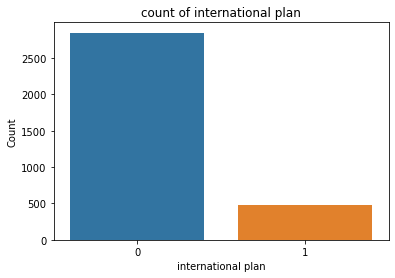

In [8]:
# count plot for international plan
print(df['international plan'].value_counts())
sns.countplot(data=df, x='churn');
plt.xlabel('international plan')
plt.ylabel('Count')
plt.title('count of international plan')

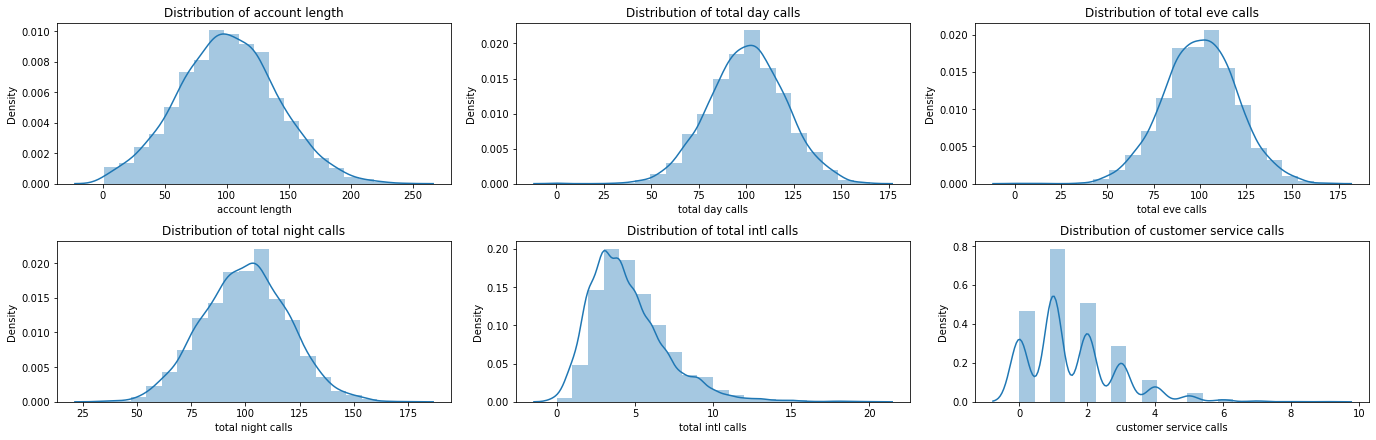

In [9]:
# Function to create distribution plots
def plot_distributions(df, columns, bins=20, figsize=(19, 6)):
    num_cols = len(columns)
    num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed
    fig, ax = plt.subplots(num_rows, 3, figsize=figsize, constrained_layout=True)
    ax = ax.flatten()  # Flatten the 2D array of axes to 1D for easier indexing

    for i, column in enumerate(columns):
        sns.distplot(df[column], bins=bins, ax=ax[i])
        ax[i].set_title(f'Distribution of {column}')

    # Hide any remaining empty subplots
    for j in range(i + 1, len(ax)):
        fig.delaxes(ax[j])

    plt.show()
    # Columns to plot
columns_to_plot = [
    'account length', 'total day calls', 'total eve calls',
    'total night calls', 'total intl calls', 'customer service calls'
]

# Call the function
plot_distributions(df, columns_to_plot)

### Checking for outliers:

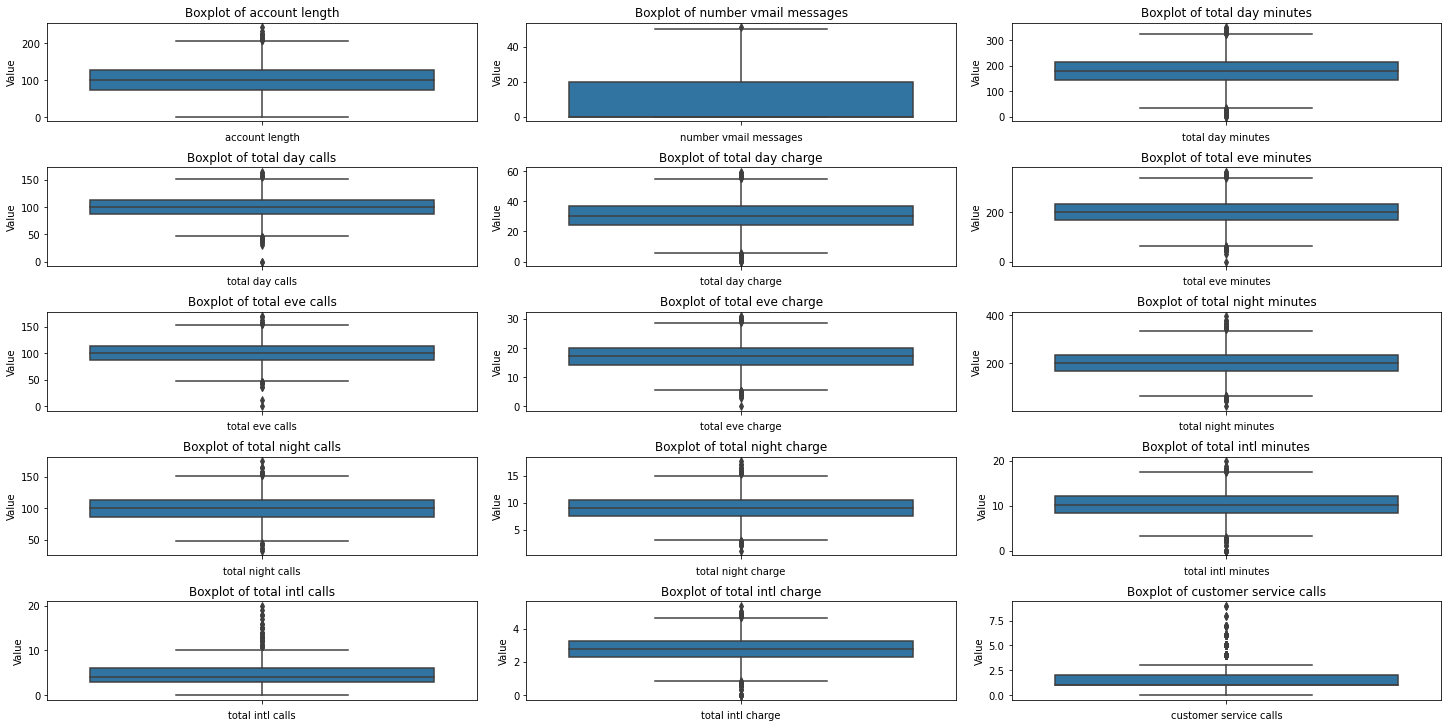

In [10]:
# creating categorical and numerical columns
num_columns = ['account length','number vmail messages','total day minutes','total day calls','total day charge',
                'total eve minutes','total eve calls','total eve charge','total night minutes','total night calls',
                'total night charge','total intl minutes','total intl calls','total intl charge','customer service calls']
categ_columns = ['state','area code','international plan','voice mail plan']

def plot_boxplots(df, columns, figsize=(20, 10)):
   
    n_cols = 3  # Number of columns in the subplot grid
    n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate rows needed based on the number of columns
    
    fig, ax = plt.subplots(n_rows, n_cols, figsize=figsize, constrained_layout=True)
    ax = ax.flatten()  # Flatten the array of axes for easy iteration

    for i, column in enumerate(columns):
        sns.boxplot(y=df[column], ax=ax[i])
        ax[i].set_title(f'Boxplot of {column}')
        ax[i].set_xlabel(column)
        ax[i].set_ylabel('Value')
    
    # Remove any unused subplots
    for i in range(len(columns), len(ax)):
        fig.delaxes(ax[i])
    
    plt.show()
plot_boxplots(df, num_columns)

In [11]:
#dealing with outliers
def remove_outliers(df, columns):
    df_no_outliers = df.copy()
    for column in columns:
        z_scores = zscore(df[column])
        outliers = (z_scores > 3) | (z_scores < -3)
        df_no_outliers.loc[outliers, column] = df[column].median()
    return df_no_outliers
df_no_outliers = remove_outliers(df, num_columns)


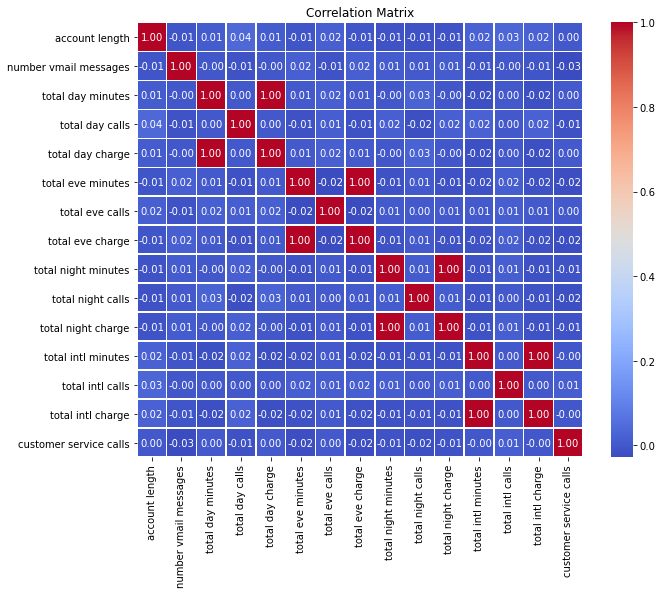

In [12]:
#correlation matrix for the num_columns
# Calculate the correlation matrix
correlation_matrix = df_no_outliers[num_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [13]:
# Function to identify and drop highly correlated features
def drop_highly_correlated_features(df, columns, threshold=0.9):
    # Calculate the correlation matrix
    corr_matrix = df[columns].corr().abs()
    
    # Create an upper triangle matrix of correlations
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # Find features with correlation greater than the threshold
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
    
    # Drop the features
    df_dropped = df.drop(columns=to_drop)
    
    return df_dropped, to_drop
# Drop highly correlated features
df_reduced, dropped_features = drop_highly_correlated_features(df_no_outliers, num_columns, threshold=0.9)


In [14]:
print(dropped_features)

['total day charge', 'total eve charge', 'total night charge', 'total intl charge']


In [15]:
print(df_reduced.shape)
df_reduced.info()

(3333, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   float64
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   float64
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   float64
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   float64
 10  total night minutes     3333 non-null   float64
 11  total night calls       3333 non-null   float64
 12  total intl minutes      3333 non-null   float64
 13  total intl calls        3333 non-null   float64
 14  customer service calls  3333 

## DATA PREPARATION

In this section, preparation of the dataset for machine learning by transforming all features into a format suitable for modeling is done. This involves encoding categorical variables, scaling numerical features, splitting the dataset into training and testing sets, and finally applying SMOTE to correct class imbalance. These steps ensure that the model receives clean, standardized, and balanced data, which improves performance and fairness during prediction.

In [16]:


# -----------------------------------------------------
# Function: Prepare Data (Encoding + Scaling)
# -----------------------------------------------------

def prepare_features(df, categorical_cols, numerical_cols):
    """
    Encodes categorical features, scales numerical features,
    and returns a clean final feature DataFrame.
    """
    
    # --- One H]\==ot Encoding ---
    ohe = OneHotEncoder(sparse=False)
    X_cat = ohe.fit_transform(df[categorical_cols])
    X_cat_df = pd.DataFrame(X_cat, columns=ohe.get_feature_names(categorical_cols))
    
    # --- Scaling Numerical Features ---
    scaler = MinMaxScaler()
    X_num = scaler.fit_transform(df[numerical_cols])
    X_num_df = pd.DataFrame(X_num, columns=numerical_cols)
    
    # --- Combine Encoded + Scaled ---
    X_final = pd.concat([X_cat_df, X_num_df], axis=1)
    
    return X_final, ohe, scaler


# -----------------------------------------------------
# Function: Split and Balance Data
# -----------------------------------------------------

def split_and_balance(X, y, test_size=0.2, random_state=1):
    """
    Splits data into train-test sets and applies SMOTE to the training set.
    """
    
    # Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    # Apply SMOTE only on training data
    sm = SMOTE(random_state=random_state)
    X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)
    
    return X_train_balanced, X_test, y_train_balanced, y_test


# -----------------------------------------------------
# USING THE FUNCTIONS
# -----------------------------------------------------

# Columns
categorical_cols = ['state', 'international plan', 'voice mail plan', 'area code']

# Numerical columns (after removing the dropped ones)
numerical_cols = [col for col in num_columns if col not in dropped_features]

# Prepare X
X_prepared, encoder, scaler = prepare_features(df_reduced, categorical_cols, numerical_cols)

# Target
y = df_reduced['churn']

# Split + Balance
X_train, X_test, y_train, y_test = split_and_balance(X_prepared, y)

# Check class distribution after SMOTE
print(y_train.value_counts())


1    2281
0    2281
Name: churn, dtype: int64


### Summary of Data Preparation Steps

| Step | Description | Why It’s Done |
|------|-------------|----------------|
| **1. Split Features and Target** | Separate the input features (X) from the target variable (y = churn). | Models train on X and learn to predict y, so the two must be separated. |
| **2. One-Hot Encoding** | Convert categorical columns into 0/1 binary columns using `OneHotEncoder`. | ML models require numerical inputs; encoding prevents misinterpreting categories as numeric values. |
| **3. Scaling Numerical Features** | Transform numerical columns to a 0–1 range using `MinMaxScaler`. | Prevents large-valued features from dominating small-valued ones; improves model stability. |
| **4. Combine Encoded + Scaled Features** | Merge all processed columns into a final cleaned dataset. | Ensures the model receives fully numeric and standardized input. |
| **5. Train–Test Split** | Split data into training (80%) and testing (20%). | Training evaluates model learning while testing checks real-world performance. |
| **6. Check Class Imbalance** | Count the number of churn vs. non-churn samples. | Imbalance causes the model to favor the majority class. |
| **7. Apply SMOTE (Oversampling)** | Generate synthetic samples for the minority class in the training data only. | Balances the classes so the model learns churn patterns better and avoids bias. |
| **8. Final Training Data** | Balanced `X_train` and `y_train` with equal class counts. | Ensures fair model training and improved predictive power. |



## MODELLING

### LOGISTICS REGRESSION MODEL

In [17]:
# Instantiate the logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on training data
y_pred_train = model.predict(X_train)
# Make predictions on test data
y_pred_test = model.predict(X_test)
# Print classification report for test data
print(classification_report(y_test, y_pred_test, target_names=['0', '1']))


              precision    recall  f1-score   support

           0       0.93      0.76      0.84       569
           1       0.33      0.67      0.44        98

    accuracy                           0.75       667
   macro avg       0.63      0.72      0.64       667
weighted avg       0.84      0.75      0.78       667



In [18]:
print('Training Precision: ', precision_score(y_train, y_pred_train))
print('Testing Precision: ', precision_score(y_test, y_pred_test))
print('\n\n')

print('Training Recall: ', recall_score(y_train, y_pred_train))
print('Testing Recall: ', recall_score(y_test, y_pred_test))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, y_pred_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_pred_test))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, y_pred_train))
print('Testing F1-Score: ', f1_score(y_test, y_pred_test))

Training Precision:  0.768522577816747
Testing Precision:  0.3251231527093596



Training Recall:  0.768522577816747
Testing Recall:  0.673469387755102



Training Accuracy:  0.768522577816747
Testing Accuracy:  0.7466266866566716



Training F1-Score:  0.768522577816747
Testing F1-Score:  0.43853820598006643


The model demonstrates strong learning performance on the training data, achieving balanced precision, recall, and F1-score of approximately 0.77. When evaluated on unseen test data, recall remains relatively high at 0.67, indicating the model’s ability to identify customers at risk of churning. However, precision drops to 0.33, suggesting an increase in false positive churn predictions. This trade-off reflects a recall-focused model that prioritizes identifying potential churners over minimizing false alarms, which may be suitable depending on the cost of customer retention strategies.

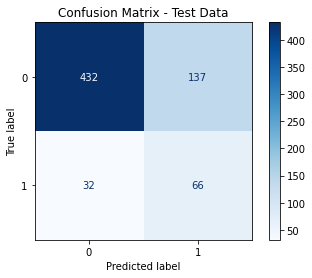

In [19]:
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
# Plot confusion matrix for the test data
disp_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test, display_labels=['0', '1'])
disp_test.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Test Data')
plt.show()

The confusion matrix shows that the model performs well at identifying non-churners, correctly classifying most of them (432 true negatives), but it struggles with precision when predicting churners. Although it successfully detects a good proportion of actual churners (66 true positives, about 67% recall), it also incorrectly labels many non-churners as churners (137 false positives), which lowers precision. Overall, the model prioritizes catching churners rather than being very accurate about who will churn, making it useful for retention strategies where missing a churner is more costly than contacting a customer who would not churn.

### DECISION TREE 

In [20]:
model2 = DecisionTreeClassifier(random_state=23)
# Fit the model on the training data
model2.fit(X_train, y_train)

# Make predictions on training data
y_pred_train2 = model2.predict(X_train)
# Make predictions on test data
y_pred_test2 = model2.predict(X_test)
# Print classification report for test data
print(classification_report(y_test, y_pred_test2, target_names=['0', '1']))


print('Training Precision: ', precision_score(y_train, y_pred_train2))
print('Testing Precision: ', precision_score(y_test, y_pred_test2))
print('\n\n')

print('Training Recall: ', recall_score(y_train, y_pred_train2))
print('Testing Recall: ', recall_score(y_test, y_pred_test2))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, y_pred_train2))
print('Testing Accuracy: ', accuracy_score(y_test, y_pred_test2))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, y_pred_train2))
print('Testing F1-Score: ', f1_score(y_test, y_pred_test2))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       569
           1       0.52      0.69      0.60        98

    accuracy                           0.86       667
   macro avg       0.73      0.79      0.76       667
weighted avg       0.88      0.86      0.87       667

Training Precision:  1.0
Testing Precision:  0.5230769230769231



Training Recall:  1.0
Testing Recall:  0.6938775510204082



Training Accuracy:  1.0
Testing Accuracy:  0.8620689655172413



Training F1-Score:  1.0
Testing F1-Score:  0.5964912280701755


The Decision Tree model demonstrates strong predictive performance, achieving high accuracy and substantially improved churn detection compared to previous models. It correctly identifies most non-churners and captures approximately 69% of actual churners, making it effective for customer retention efforts. However, the model exhibits signs of overfitting, as evidenced by perfect training scores, suggesting that pruning or limiting tree depth would be necessary to improve generalization to unseen data

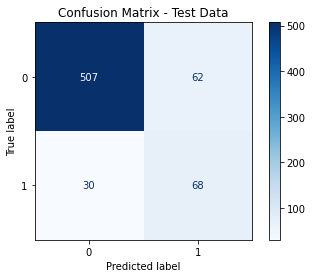

In [21]:
conf_matrix_test = confusion_matrix(y_test, y_pred_test2)
# Plot confusion matrix for the test data
disp_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test, display_labels=['0', '1'])
disp_test.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Test Data')
plt.show()

This confusion matrix shows that the model performs very well at identifying non-churners, correctly classifying 507 customers who did not churn, with relatively few false alarms (62 false positives). It also identifies a good proportion of actual churners, correctly predicting 68 churn cases, while missing 30 churners. Overall, the model achieves a strong balance between catching customers at risk of churning and minimizing unnecessary churn predictions, making it more reliable and cost-effective for churn prediction than the earlier model.

### RANDOM FOREST MODEL

In [22]:
model3 = RandomForestClassifier(random_state=24)

# Fit the model on the training data
model3.fit(X_train, y_train)

# Make predictions on training data
y_pred_train3 = model3.predict(X_train)
# Make predictions on test data
y_pred_test3 = model3.predict(X_test)
# Print classification report for test data
print(classification_report(y_test, y_pred_test3, target_names=['0', '1']))


print('Training Precision: ', precision_score(y_train, y_pred_train3))
print('Testing Precision: ', precision_score(y_test, y_pred_test3))
print('\n\n')

print('Training Recall: ', recall_score(y_train, y_pred_train3))
print('Testing Recall: ', recall_score(y_test, y_pred_test3))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, y_pred_train3))
print('Testing Accuracy: ', accuracy_score(y_test, y_pred_test3))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, y_pred_train3))
print('Testing F1-Score: ', f1_score(y_test, y_pred_test3))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       569
           1       0.69      0.64      0.67        98

    accuracy                           0.91       667
   macro avg       0.82      0.80      0.81       667
weighted avg       0.90      0.91      0.90       667

Training Precision:  1.0
Testing Precision:  0.6923076923076923



Training Recall:  1.0
Testing Recall:  0.6428571428571429



Training Accuracy:  1.0
Testing Accuracy:  0.9055472263868066



Training F1-Score:  1.0
Testing F1-Score:  0.6666666666666666


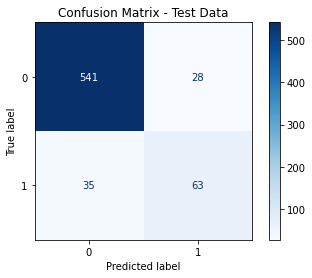

In [23]:
conf_matrix_test = confusion_matrix(y_test, y_pred_test3)
# Plot confusion matrix for the test data
disp_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test, display_labels=['0', '1'])
disp_test.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Test Data')
plt.show()

The Random Forest model demonstrates strong and well-balanced performance, achieving a high test accuracy of 91%. It effectively identifies non-churners while also improving churn detection, correctly capturing 64% of actual churners with a precision of 69%. Although the model fits the training data perfectly, its strong test results indicate good generalization and reduced overfitting compared to simpler tree-based models. Overall, this model provides the most reliable and business-useful churn predictions among the models evaluated.

This confusion matrix shows that the model performs very strongly overall, especially in identifying non-churners. It correctly classifies 541 non-churn customers with very few false positives (28), indicating high precision for the non-churn class. The model also identifies a good number of churners (63 true positives), though it still misses some (35 false negatives). Overall, the model achieves a strong balance between minimizing false alarms and correctly detecting customers at risk of churning, making it well-suited for churn prediction tasks.

## MODELS EVALUATION

We will assess the performance of the models by examining their ROC curves and comparing their accuracy on training and testing data to identify any signs of overfitting. The final model will be selected based on achieving the highest AUC score while also demonstrating good generalization, meaning it performs well on unseen data without overfitting.

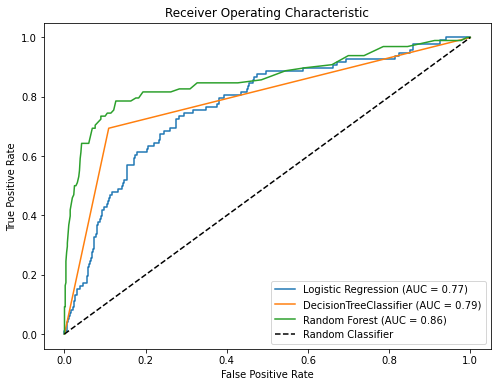

In [24]:
# Define the models
models = [model, model2, model3]  

# Define the model names for plotting
model_names = ['Logistic Regression','DecisionTreeClassifier', 'Random Forest']  

# Plot ROC curves for each model
plt.figure(figsize=(8, 6))

for model, name in zip(models, model_names):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

# Plot the random classifier ROC curve (diagonal line)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Set plot labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

plt.show()

The ROC curve shows that the Random Forest model performs best, with the highest AUC (0.86), indicating the strongest ability to distinguish between churners and non-churners. The Decision Tree performs moderately well (AUC = 0.79), while Logistic Regression has the lowest performance (AUC = 0.77). Overall, Random Forest is the most reliable model among the three.

In [25]:
# Create an empty DataFrame to store the results
results_accuracy = pd.DataFrame(columns=["Models", "Accuracy"])

# Iterate over the model names and models
for model_name, model in zip(model_names, models):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append the results to the DataFrame
    results_accuracy = results_accuracy.append({"Models": model_name, "Accuracy": accuracy * 100}, ignore_index=True)

# Sort the DataFrame by accuracy in descending order
results_accuracy = results_accuracy.sort_values(by="Accuracy", ascending=False)

# Print the sorted results
print(results_accuracy)


                   Models   Accuracy
2           Random Forest  90.554723
1  DecisionTreeClassifier  86.206897
0     Logistic Regression  74.662669


The Random Forest model is an appropriate choice because of its high accuracy, F1 score, It obtained an accuracy of 94.685% and an F1 score of 0.841, demonstrating its ability to effectively identify occurrences while maintaining a balance of precision and recall.

#### Performing hyperparameter tuning on the Random Forest Model

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   23.2s finished


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       569
           1       0.70      0.63      0.66        98

    accuracy                           0.91       667
   macro avg       0.82      0.79      0.80       667
weighted avg       0.90      0.91      0.90       667

Training Precision:  1.0
Testing Precision:  0.6923076923076923



Training Recall:  1.0
Testing Recall:  0.6428571428571429



Training Accuracy:  1.0
Testing Accuracy:  0.9055472263868066



Training F1-Score:  1.0
Testing F1-Score:  0.6666666666666666


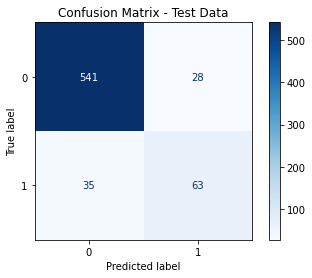

In [26]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
   'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
# Instantiate the logistic regression model
model_R = RandomForestClassifier()

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=model_R, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Make predictions on training data with the best model
y_pred_train = best_model.predict(X_train)

# Make predictions on test data with the best model
y_pred_test = best_model.predict(X_test)

# Print classification report for test data
print(classification_report(y_test, y_pred_test, target_names=['0', '1']))

# Calculate and print various performance metrics
print('Training Precision: ', precision_score(y_train, y_pred_train3))
print('Testing Precision: ', precision_score(y_test, y_pred_test3))
print('\n\n')

print('Training Recall: ', recall_score(y_train, y_pred_train3))
print('Testing Recall: ', recall_score(y_test, y_pred_test3))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, y_pred_train3))
print('Testing Accuracy: ', accuracy_score(y_test, y_pred_test3))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, y_pred_train3))
print('Testing F1-Score: ', f1_score(y_test, y_pred_test3))

# Calculate confusion matrix for test data
conf_matrix_test = confusion_matrix(y_test, y_pred_test3)

# Plot confusion matrix for test data
disp_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test, display_labels=['0', '1'])
disp_test.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Test Data')
plt.show()


Important features from the model:

                   Feature  Importance
60       total day minutes    0.160253
68  customer service calls    0.124444
67        total intl calls    0.069781
62       total eve minutes    0.068455
64     total night minutes    0.049783
..                     ...         ...
0                 state_AK    0.001749
6                 state_CT    0.001739
36                state_OK    0.001327
17                state_KY    0.001317
12                state_IA    0.001108

[69 rows x 2 columns]


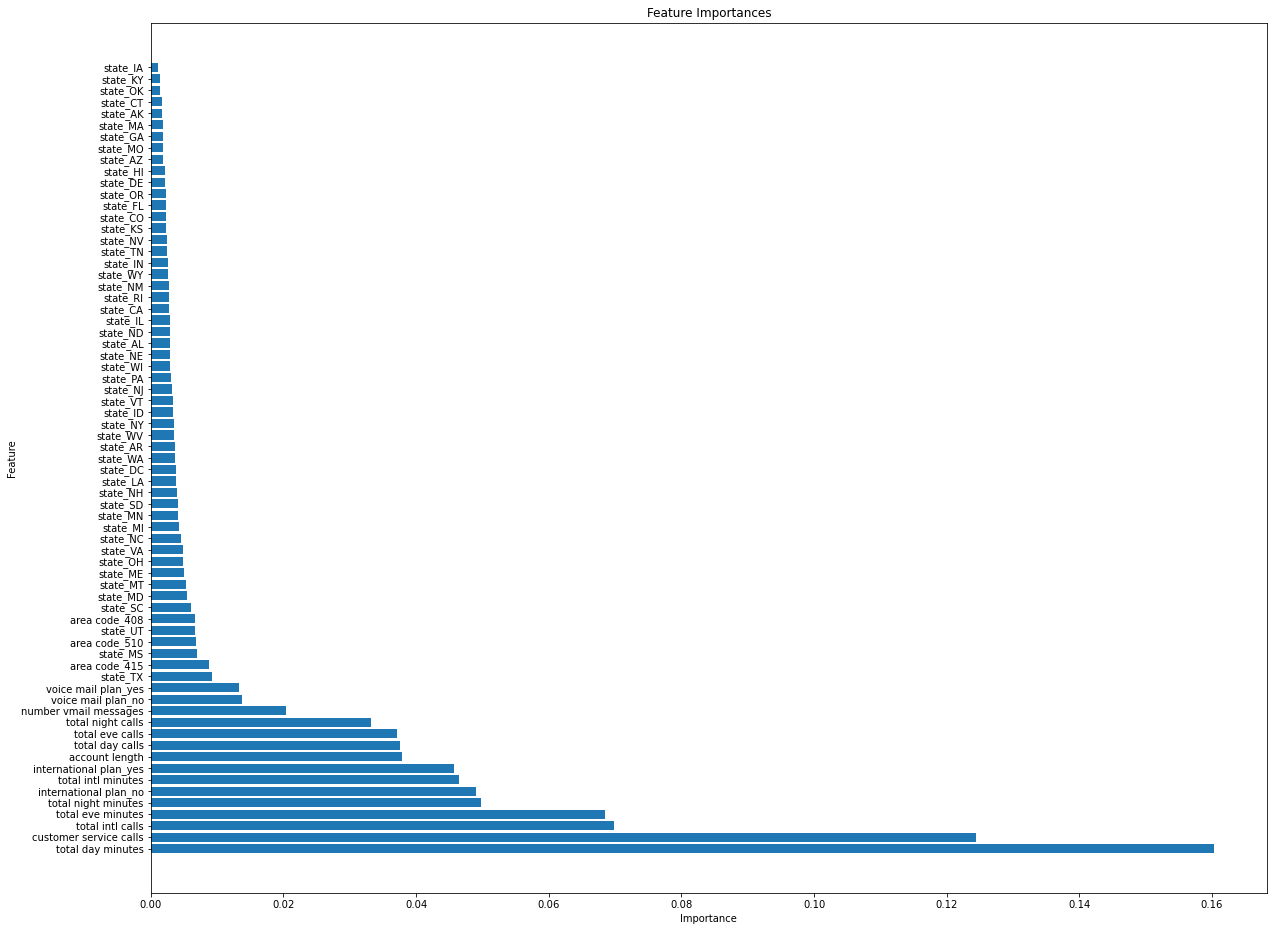

In [27]:
# Get feature importances
importances = model3.feature_importances_

# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Print or visualize feature importances
print(feature_importances)

# If you want to plot feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 16))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()




Based on the feature importance analysis from the Random Forest model, the following variables were identified as the most influential in predicting customer churn:

* Total Day Minutes
Customers with high daytime call usage are more engaged with the service and therefore more sensitive to pricing, call quality, and service disruptions. Any dissatisfaction experienced during peak usage hours increases the likelihood of churn.

* Customer Service Calls
A high number of customer service calls is a strong indicator of dissatisfaction. Frequent interactions with support often signal unresolved issues, poor service experience, or billing concerns, which significantly increase churn risk.

* Total International Calls
Customers making many international calls are more likely to churn due to higher costs and sensitivity to international pricing. If international plans are perceived as expensive or inflexible, these customers may seek alternative providers.

* Total Evening Minutes
High evening usage suggests customers rely heavily on the service during off-work hours. Service quality issues or cost concerns during these periods can strongly influence their decision to leave.

* Total Night Minutes
Customers with high night-time usage may be price-sensitive and attracted to competitors offering cheaper night call rates or better bundled plans, increasing churn risk.

### CONCLUSION

This project successfully developed a classification model to predict customer churn for SyriaTel and evaluated multiple models using accuracy, recall, F1-score, and ROC–AUC. The Random Forest model emerged as the best-performing model, demonstrating strong predictive power and good generalization. Feature importance analysis revealed that customer churn is largely driven by usage intensity and service experience, particularly total day, evening, and night minutes, the number of customer service calls, and international call activity. These findings indicate that highly active customers and those frequently interacting with customer support are more sensitive to pricing, service quality, and unresolved issues, making them more likely to churn.

### RECOMMENDATIONS

* Improve Customer Service Resolution: Prioritize resolving customer issues on the first interaction, especially for customers with frequent service calls, as repeated contact is a strong churn indicator.

* Target High-Usage Customers: Monitor customers with high day, evening, and night call minutes and proactively offer loyalty incentives, improved service quality, or personalized plans to reduce churn risk.

* Review International Call Pricing: Reassess international call rates and consider bundled or discounted international plans to retain customers with high international call usage.

* Proactive Retention Strategies: Use the churn model to identify high-risk customers early and engage them with targeted retention campaigns before they decide to leave.

* Continuous Model Monitoring: Regularly retrain and evaluate the model using new data to ensure it remains accurate as customer behavior and market conditions change.